# Spotting High-Risk Alcohol Consuming Students Using Neural Networks

##### Name         : Christy Sara Saji
##### University   : Gisma University Of Applied  Sciences

# Table of Contents

- [1. Introduction](#introduction)
- [2. Problem Statement](#problem-statement)
- [3. Methodology](#methodology)
    - [3.1. Dataset Overview](#dataset-overview)
    - [3.2. Exploratory Data Analysis](#exploratory-data-analysis)
    - [3.3. Class Imbalance Handling and SMOTE](#class-imbalance-handling-and-smote)
- [4. Results](#results)
    - [4.1. Model Selection and Hyperparameter Tuning](#model-selection-and-hyperparameter-tuning)
    - [4.2. Model Evaluation](#model-evaluation)
- [5. Discussion and Implications](#discussion-and-implications)
- [6. Final Discussion on the Overall Pipeline](#final-discussion-on-the-overall-pipeline)
- [7. References](#references)


##### Dataset link: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data
   

# 1. Introduction 

# Overview of the business problem
##### Usage of alcohol among school students affects their academic performance and leads to severe health issues. Therefore, schools and other educational institutions are interested in finding the students who are at high risk of alcohol consumption. However, classifying students is difficult due to academic, social and other personal factors.

# Objective of the business problem
##### The main aim of the analysis is to implement a data-centric plan that precisely marks students who are at high risk of alcohol consumption. By using the data collected during the survey, which contains all the information about the students and their background, we aim to build a predictive model that supports the school administration to take action into their own hands and develop some strategies to help students who are in danger.

# 2. Problem statement
##### Based on the report of alcohol consumption, the business problem will be treated as a binary classification problem, where the target is whether a student is a high-risk(1) or not high risk(0).

# Significance of solving the business problem
##### Identifying high-risk students and reporting them for counseling can prevent health problems, academic failure, and social issues.

# 3. Methodology

# Data collection strategy
##### The data were obtained in a survey of students who have taken mathematics and Portuguese language courses in secondary school. Here, I've taken only the dataset that contains information about mathematics students. Since it is a tabular datatset, we are using a multi-layer perceptron(MLP) architecture from artificial neural network.

In [3]:
# Importing the necessary libraries for data manipulation, visualisation, pre-processing, and neural network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight



import tensorflow as tf
import keras
from tensorflow.keras import Sequential, Input, regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from imblearn.over_sampling import SMOTE

# set seeds for productivity
np.random.seed(42)
tf.random.set_seed(42)


In [10]:
# load the dataset
df = pd.read_csv('student-mat.csv')
df.head() #first few rows of the dataset will display

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Exploratory Data Analysis

In [113]:
# data types and summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### df.describe() provides the statistics of the dataset, such as different counts, means, standard deviation, minimum value, 25th percentile, medians, 75th percentile, and maximum values in each columns.

# Data Visualisation

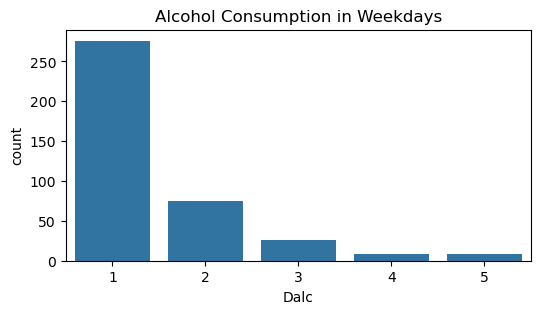

In [10]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x = 'Dalc')
plt.title('Alcohol Consumption in Weekdays')
plt.show()

#### The above plot shows the number of students who consume alcohol in weekdays

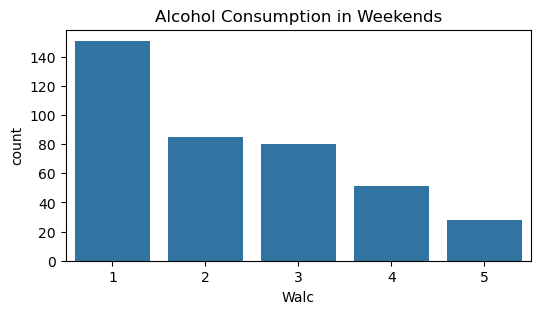

In [12]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x = 'Walc')
plt.title('Alcohol Consumption in Weekends')
plt.show()

#### The above plot shows the number of students who take alcohol in weekends. Thus,the rate of alcohol consumption is extremely higher on weekend than weekdays

In [12]:
df['avg_alc'] = (df['Dalc'] + df['Walc']) / 2    ## finding the average alcohol use in weekends and weekdays
df['avg_alc']

0      1.0
1      1.0
2      2.5
3      1.0
4      1.5
      ... 
390    4.5
391    3.5
392    3.0
393    3.5
394    3.0
Name: avg_alc, Length: 395, dtype: float64

#### Calculating the average consumption of alcohol in both weekends and weekdays among students. 'Dalc' is the column that represents the consumption of alcohol on weekdays. On the other hand, 'Walc' is for weekends.

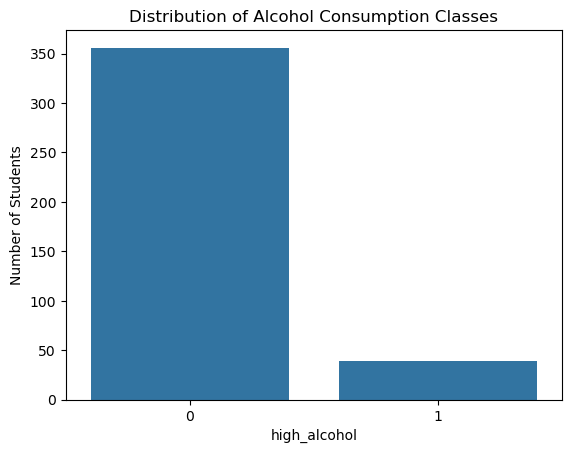

In [14]:
df['high_alcohol'] = df['avg_alc'].apply(lambda x: 1 if x > 3 else 0)  ## Creating a new column 'high_alcohol' 

# visualising the column 'high_alcohol'
sns.countplot(x='high_alcohol', data=df)
plt.ylabel("Number of Students")
plt.title('Distribution of Alcohol Consumption Classes')
plt.show()

#### In the above figure, we have created a binary classification target variable 'high_alcohol' which classifies students into 1 and 0 based on their alcohol consumption.Here, 0 represents low/moderate alcohol consumption; whereas, 1 represents high alcohol consumption if the 'avg_alc' is greater than 3

In [18]:
# Check for missing values
df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
avg_alc         0
high_alcohol    0
dtype: int64

#### No missing values are found according to the above values

# Data Preprocessing

In [16]:
df = df.drop(columns=['Dalc', 'Walc', 'avg_alc'])
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('high_alcohol', axis=1)
y = df_encoded['high_alcohol']

#### In the above step, the columns 'Dalc', 'Walc', and 'avg_alc' are dropped, and the categorical features are encoded.

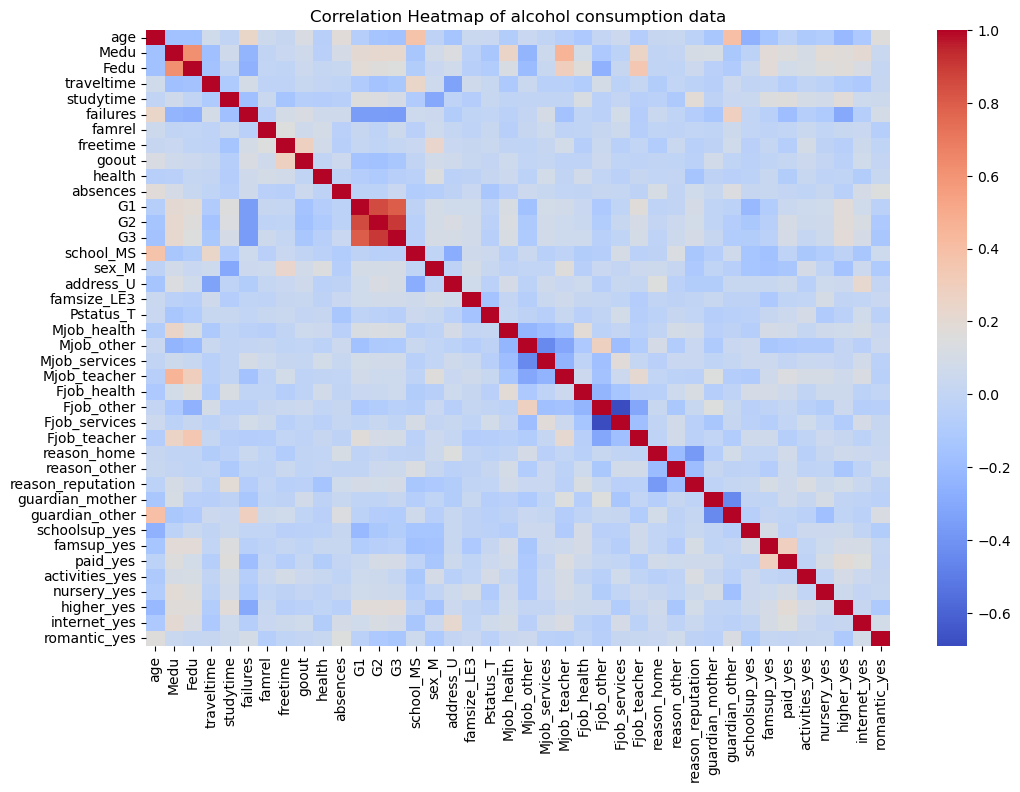

In [18]:
# After dropping columns and one-hot encoding:
df_encoded = pd.get_dummies(df, drop_first=True)

#dropping target variable
features_only = df_encoded.drop('high_alcohol', axis=1)

# Computing the correlation matrix
corr_matrix = features_only.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of alcohol consumption data")
plt.show()


#### The above heatmap shows the relationships between alcohol consumption levels and other various factors in the dataset

In [20]:
# spitting the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

# Feature Engineering

In [22]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### StandardScaler is used to scale the numerical features present. According to the standardization of the dataset, all numerical features should have a mean of 0 and a standard deviation of 1.

In [24]:
X_train_scaled = np.array(X_train_scaled, dtype=np.float32)
x_val_scaled = np.array(X_val_scaled, dtype=np.float32)
X_test_scaled = np.array(X_test_scaled, dtype=np.float32)
y_train = y_train.values.astype(np.float32)
y_val = y_val.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

#### The above code converts the data arrays to NumPy arrays.

In [26]:
print("Train:", X_train_scaled.shape, y_train.shape)
print("Val:  ", X_val_scaled.shape, y_val.shape)
print("Test: ", X_test_scaled.shape, y_test.shape)

Train: (284, 40) (284,)
Val:   (32, 40) (32,)
Test:  (79, 40) (79,)


#### Here, it prints the shapes ( size of the array) of the training, validation, and testing datasets.

In [28]:
# Check if class imbalance is present or not
class_balance = df['high_alcohol'].value_counts()
print("Class distribution:", class_balance)

Class distribution: high_alcohol
0    356
1     39
Name: count, dtype: int64


#### The above figure shows that the dataset is highly imbalanced. 

In [30]:
# class imbalance is handled using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

#### To address the class imbalance issue, the Synthetic Minority Over-sampling Technique (SMOTE) is initiated to create artificial samples for the minority class, which helps to balance the distribution between the classes. "It helps to distribute the classes nicely by building new, similar examples from the given classes"(Chai et al., 2022). 

# Building the Model 

In [173]:
for units in [64, 128]:
    for dropout in [0.2, 0.3]:
        model = Sequential([
            Input(shape=(X_train_res.shape[1],)),
            Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            BatchNormalization(),
            Dropout(dropout),
            Dense(units // 2, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            BatchNormalization(),
            Dropout(dropout),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,385 (64.00 KB)

 Trainable params: 16,001 (62.50 KB)

 Non-trainable params: 384 (1.50 KB)

#### A Sequential neural network is built using Keras and Tensorflow. The model architecture consists of a Multi-layer Perceptron(MLP) with three dense layers(128,64,32), batch normalisation, dropout, and sigmoid activation function in the output layer. L2 regularization will help the model from overfitting. MLP is the only neural network that can be used here to train a tabular dataset.

# Model Training

In [179]:
batch_size = 128
epochs = 20

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
results = model.fit( X_train_res, y_train_res, batch_size=batch_size, epochs=epochs,validation_data=(X_val_scaled, y_val),callbacks=[es_callback],verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.4815 - loss: 0.9484 - val_accuracy: 0.5312 - val_loss: 0.8544
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6128 - loss: 0.8059 - val_accuracy: 0.6562 - val_loss: 0.8043
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7237 - loss: 0.7288 - val_accuracy: 0.7188 - val_loss: 0.7626
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7753 - loss: 0.6582 - val_accuracy: 0.8125 - val_loss: 0.7274
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8219 - loss: 0.5799 - val_accuracy: 0.8125 - val_loss: 0.6966
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8711 - loss: 0.5434 - val_accuracy: 0.8125 - val_loss: 0.6729
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8867 - loss: 0.4965 - val_accuracy: 0.7812 - val_loss: 0.6523
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9203 - loss: 0.4569 - val_accuracy: 0.8125 - val_loss: 0.6318

#### Model compiling and training take place in the above cell.'binary_crossentropy' is called since it is a binary classification task; a very effective optimizer 'adam' has been used, and an Early Stopping (callbacks) has been defined to stop training early if it is needed. 

# Model Evaluation

In [181]:
y_pred_proba = model.predict(X_test_scaled)  # get predicted probabilities
y_pred_3 = (y_pred_proba > 0.3).astype("int32")  # use threshold 0.3
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Test loss: 0.5591813325881958
Test accuracy: 0.8101266026496887


#### To fix the class imbalance, the threshold has been adjusted to 0.3

In [187]:
y_pred = (model.predict(X_test_scaled) > 0.3).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC - AUC Score:", roc_auc_score(y_test, y_pred_proba))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82        71
           1       0.17      0.50      0.26         8

    accuracy                           0.71        79
   macro avg       0.55      0.62      0.54        79
weighted avg       0.85      0.71      0.76        79

ROC - AUC Score: 0.7024647887323944


In [191]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
minority_recall = report_dict['1']['recall']
print(f"Recall for Minority Class (Class 1): {minority_recall:.4f}")

Recall for Minority Class (Class 1): 0.5000


#### Model evaluation is done using the classification matrix, which includes accuracy, precision, recall, f1-score, and ROC-AUC. The important feature matrix is recall, as it shows the high-risk (minority) class of students, which scored 0.50, demonstrating that the model could recognise only half of the students who are at high-risk of alcohol consumption. On the other hand, the ROC-AUC score is 0.70, which is an above-average score, indicating that the model is able to distinguish between high-risk students and low-risk students; hence, it is better than random guessing.

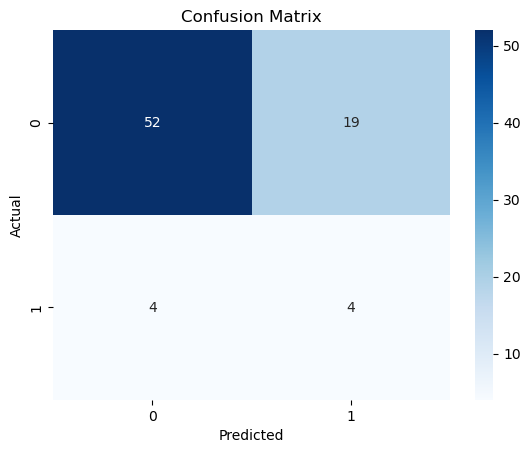

In [193]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### The above confusion matrix shows that the model predicted 52 not high-risk students as not high-risk themselves. On the other hand, it also incorrectly predicted 19 not-so-high-risk students as high-risk, resulting in a false alarm. Although it is not appropriate to misinterpret, it is better than missing a student who is at high risk of alcohol consumption. This variation is common in imbalanced datasets, where we have to prioritize recall for the minority class. However, it is also clear that 4 students were actually at high risk, but were predicted as not, resulting in a failed attempt to identify students. Also, the model could achieve the primary objective by identifying 4 high-risk students correctly.¶

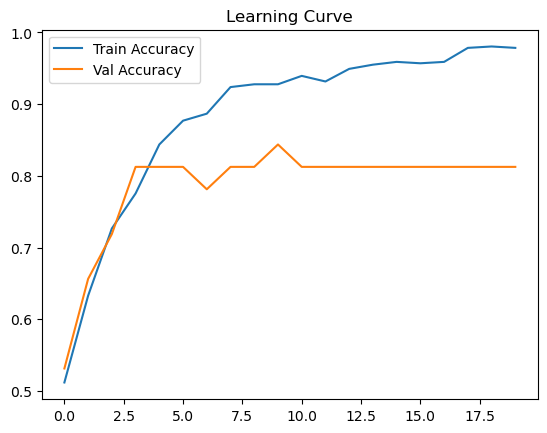

In [195]:
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()

#### The learning curve indicates that the model is fitting well on the training data. The validation accuracy also increases and then it plateaus, showing that the model is learning patterns after some epochs. The validation accuracy becomes flat or far lower than the training accuracy, suggesting that a slight overfitting or class imbalance issue is present with the model.

### Experiment Table

| Exp # | Model Architecture           | Dropout | SMOTE | Class Weights | Threshold | Val Accuracy | Test ROC-AUC | Test Recall (Minority) |
|-------|------------------------------|---------|-------|---------------|-----------|--------------|--------------|-----------------------|
| 1     | 3x(128,64,32), relu + BN     | 0.4/0.3 | Yes   | No            | 0.2       | 0.87         | 0.70         | 0.38                  |
| 2     | 3x(64,32,32), relu +  BN     | 0.3/0.2 | Yes   | No            | 0.2       | 0.80         | 0.74         | 0.40                  |
| 3     | 3x(64,32,32), relu +  BN     | 0.3/0.2 | No    | No            | 0.2       | 0.81         | 0.97         | 1.80                  |
| 4     | 3x(64,32,32), relu +  BN     | 0.3/0.2 | Yes   | No            | 0.5       | 0.81         | 0.55         | 0.50                  |
| 5     | 3x(128,64,32), relu + BN     | 0.4/0.3 | Yes   | No            | 0.5       | 0.81         | 0.73         | 0.32                  |
| 6     | 3x(128,64,32), relu + BN     | 0.4/0.3 | Yes   | Yes           | 0.3       | 0.87         | 0.70         | 0.51                  |
| 7     | 3x(128,64,32), relu + BN     | 0.4/0.3 | No    | Yes           | 0.3       | 0.84         | 0.64         | 0.38                  |
| 8     | 3x(128,64,32), relu + BN     | 0.5/0.4 | Yes   | No            | 0.3       | 0.79         | 0.68         | 0.50                  |
| 9     | 3x(128,64,32), relu + BN     | 0.3/0.2 | Yes   | No            | 0.2       | 0.65         | 0.71         | 0.38                  |
| 10    | 3x(128,64,32), relu + BN     | 0.3/0.2 | Yes   | No            | 0.3       | 0.81         | 0.70         | 0.50                  |


#### In the above experiment table, the results are displayed from different neural network configurations and hyperparameter tunings. For each experiment, different model architectures(including BatchNormalisation), dropout values, use of SMOTE, class weights, and different thresholds are being used.  Since the dataset is highly imbalanced, the test recall value is neutral and very low in most of cases. In experiment 6, the test scores are good, but the model was highly overfitted. Thus, Experiment 10 could be the best model from these observations.

# Discussion and Implications

## Model Comparison
##### Model with SMOTE and high regularization provided the best result for the recall of high alcohol consumers than the models using class weight and low regularization.
##### Other models: Other than artificial neural networks, I also trained the pipeline using Logistic regression. The results of logistic regression model are: ROC-AUC: 0.67, Recall: 0.50, Precision:0.14, which shows almost the same results as the current MLP model. Thus, it indicates that the dataset is highly imbalanced and contains weak features.

## Business Implications
##### Correlating to the business goal of identifying students who are at high risk of alcohol consumption and giving support, the model is able to identify 50% of high-risk students.

# Final discussion on the overall pipeline

## Strengths of the Model
##### Although the given data are weak, the model can flag half of the students who are at high risk of using alcohol through class balancing, regularization, and other systematic experimentation. This will be the biggest supportive tool for schools and other educational organisations, making machine learning methods in real-world practice.

## Limitations of the model
##### There are many limitations in the proposed neural network model. Firstly, it identifies only half of the high-risk students; thus, the remaining half are unidentified. Secondly, according to the learning curve, it also indicates overfitting and limited generalisation to the data which are not seen. The model also predicted some false positives, flagging low-risk students as high-risk, creating a misinterpretation. Thus, it is difficult to explain the model to the stakeholders.

## Implications of the Business Problem
##### The implemented model offers a pratical tool for identifying problematic alcohol consuming students and start early support and care. Despite the several limitations, the model could identify 50% of high risk students and flag them, which helps them out of the danger.

## Data-Driven Recommendations
##### Adding student behavioural indicators as a feature, along with more other useful data might improve the accuracy as well as the model.
##### Continously record the key metrics, when new student data is added, so that the model's effectiveness does not reduce.
##### Also, Increasing the size of data will result in more accurate predictions.

## Most Informative Features:
##### weekend alcohol consumption, academic performance, and family relationships are the best features

## Model Explainability
##### By using post-hoc explainability tools such as SHAP or LIME to explain the neural network model would be effective

## References
##### UCI Student Alcohol Consumption Dataset: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data

##### Burkov, A., 2019. The hundred-page machine learning book. Quebec City, QC: Andriy Burkov.

##### Chawla, N.V., Bowyer, K.W., Hall, L.O. and Kegelmeyer, W.P., 2002. SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, pp.321-357.

##### Géron, A., 2019. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. 2nd ed. Sebastopol, CA: O’Reilly Media.

##### Goodfellow, I., Bengio, Y. and Courville, A., 2016. Deep learning. Cambridge, MA: MIT Press.